In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants
from scipy.optimize import curve_fit

In [2]:
data_A = pd.read_csv("data/sample_A_3_thisonereally.txt", sep="\t")
V_A = data_A["V (V)"]
I_A = data_A["I (A)"]

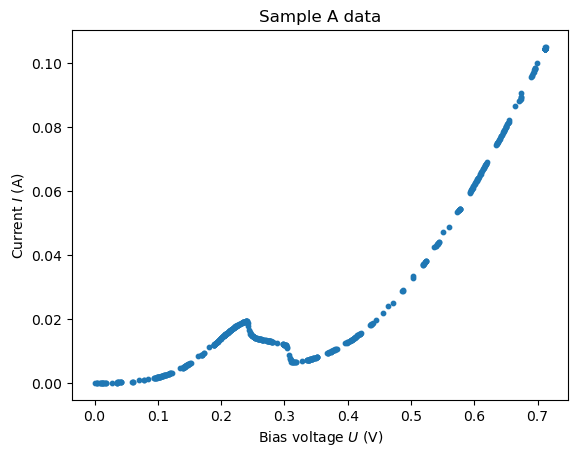

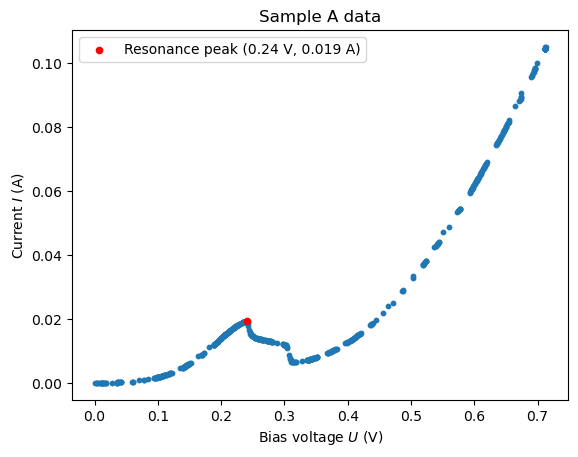

In [34]:
plt.scatter(V_A, I_A, s=10)
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample A data")

plt.savefig("figs/A_plot.svg")
plt.show()

peak_index_A = 0
for i in range(len(I_A)//2):
    if I_A[i] > I_A[peak_index_A]:
        peak_index_A = i

plt.scatter(V_A, I_A, s=10)
plt.scatter(V_A[peak_index_A], I_A[peak_index_A], s=20, label=f"Resonance peak ({V_A[peak_index_A]:.2} V, {I_A[peak_index_A]:.2} A)", c="r")
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample A data")
plt.legend()

plt.savefig("figs/A_plot_peak.svg")
plt.show()

the formula for the inter-barrier distance, knowing the bias voltage at which the first resonance peak occurs.

$$b = \sqrt{\frac{\hbar^2 \pi^2}{m^* U \gamma e}}$$

In [9]:
hbar = constants.hbar
m_e = constants.electron_mass
charge_e = constants.elementary_charge
gamma = 0.3
m_star = 0.067 * m_e

b_A = np.sqrt((hbar**2 * np.pi**2)/(m_star * V_A[peak_index_A] * gamma * charge_e))

print(f"{b_A*1e9 = :.4} nm")

b_A*1e9 = 12.47 nm


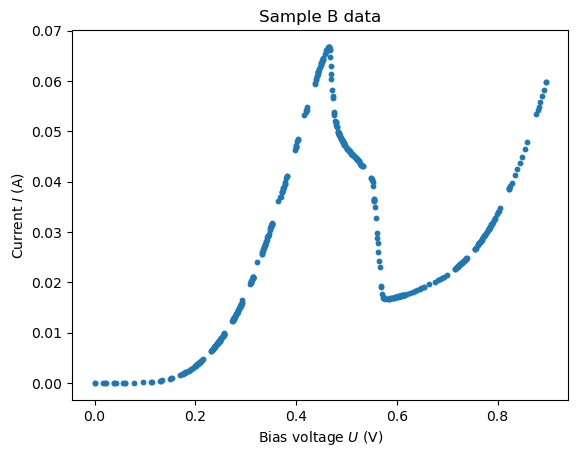

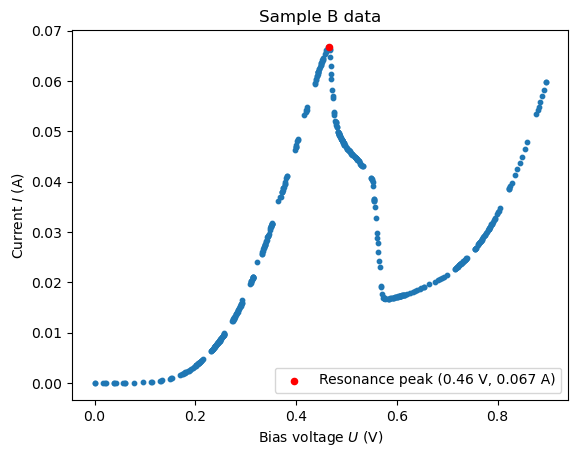

In [35]:
data_B = pd.read_csv("data/sample_B_1.txt", sep="\t")
V_B = data_B["V (V)"]
I_B = data_B["I (A)"]

plt.scatter(V_B, I_B, s=10)
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample B data")

plt.savefig("figs/B_plot.svg")
plt.show()

peak_index_B = 0
for i in range(len(I_B)//2):
    if I_B[i] > I_B[peak_index_B]:
        peak_index_B = i

plt.scatter(V_B, I_B, s=10)
plt.scatter(V_B[peak_index_B], I_B[peak_index_B], s=20, label=f"Resonance peak ({V_B[peak_index_B]:.2} V, {I_B[peak_index_B]:.2} A)", c="r")
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample B data")
plt.legend()

plt.savefig("figs/B_plot_peak.svg")
plt.show()

In [11]:
b_B = np.sqrt((hbar**2 * np.pi**2)/(m_star * V_B[peak_index_B] * gamma * charge_e))

print(f"{b_B*1e9 = :.4} nm")

b_B*1e9 = 8.974 nm


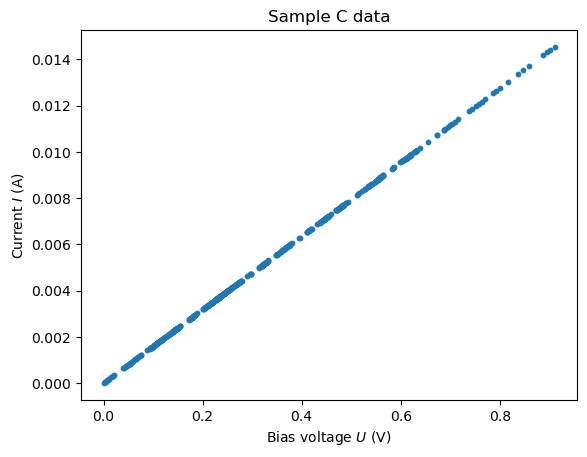

In [12]:
data_C = pd.read_csv("data/sample_C_2_thisone.txt", sep="\t")
V_C = data_C["V (V)"]
I_C = data_C["I (A)"]

plt.scatter(V_C, I_C, s=10)
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample C data")

plt.savefig("figs/C_plot.svg")
plt.show()

$$\ln(I) = \ln(const) - 2a\sqrt{\frac{2m^*}{\hbar^2}\left( V_0 - \frac{e\gamma}{2}U \right)}$$

In [14]:
def s_barrier_X(U):
    V0 = 200*1e-3 * charge_e

    return 2*np.sqrt(2*m_star/(hbar**2)) * np.sqrt(V0 - 0.5*charge_e*gamma*U)

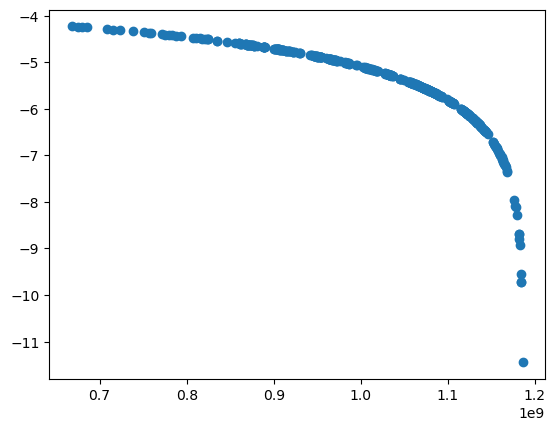

In [17]:
ln_I_C = np.log(I_C)
X_C = s_barrier_X(V_C)

plt.scatter(X_C, ln_I_C)
plt.show()

$a$ is so small that we reproduce Ohm's law. In this case, we are unable to extract a sensible value of $a$ from our data using the aformentioned strategy

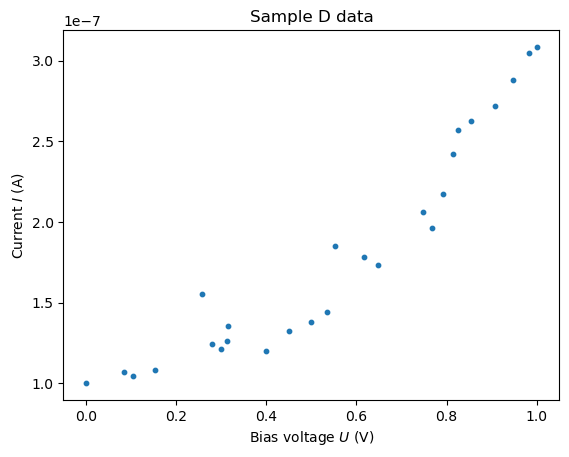

In [13]:
data_D = pd.read_csv("data/sample_D_1.txt", sep="\t")
V_D = data_D["V (V)"]
I_D = data_D["I (A)"]

plt.scatter(V_D, I_D, s=10)
plt.xlabel("Bias voltage $U$ (V)")
plt.ylabel("Current $I$ (A)")
plt.title("Sample D data")

plt.savefig("figs/D_plot.svg")
plt.show()

a=1.9753519878546246e-09


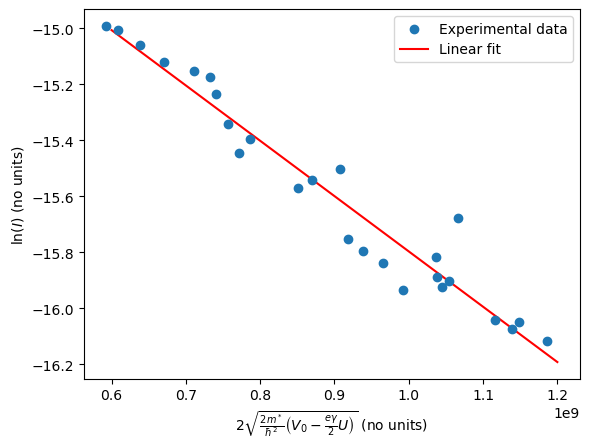

In [ ]:
def lin_model(x,m,c):
    return m*x + c

ln_I_D = np.log(I_D)
X_D = s_barrier_X(V_D)

popt, pcov = curve_fit(lin_model, X_D, ln_I_D)
a = -popt[0]
const = popt[1]
print(f"{a=}")

ln_X_space = np.linspace(0.6e9, 1.2e9, 1000)
plt.scatter(X_D, ln_I_D, label="Experimental data")
plt.plot(ln_X_space, lin_model(ln_X_space, -a, const), zorder=-1, c="r", label="Linear fit")
plt.xlabel(r"$2\sqrt{\frac{2m^*}{\hbar^2}\left( V_0 - \frac{e\gamma}{2}U \right)}$ (no units)")
plt.ylabel("$\ln(I)$ (no units)")
plt.legend("Linear fit to determine $a_C$")
plt.legend()
plt.savefig("figs/C_linear_fit.svg")
plt.show()